In [13]:
from TextClass.ClassifierCv import ClassifierCv
from TextClass.EnsembleClassifier import EnsembleClassifier
from TextClass.FasttextClassifier import FasttextClassifier
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

## Ensemble classification

ensemble classifiers use more than one classfier and combine results. Similar to skleanr VotingClassifier, but adjusted for FastText

#### data

In [5]:
text=['i am happy', 'i very friendly','you are happy', 'you are friendly','we are friendly', 'you are bad',
      'i am bad','i am unhappy','you are unhappy', 'we are unhappy']
category=['pos','pos','pos','pos','pos','neg','neg','neg','neg','neg']
data=pd.DataFrame({"text":text, "category":category})

#### define base classifiers with pipelines

In [14]:
linear_svm=LinearSVC()
nb=MultinomialNB()
ft=FasttextClassifier()

nb_pipe=Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf',nb)])
linear_svm_pipe=Pipeline([('vect', CountVectorizer()),
                          ('tfidf', TfidfTransformer()),
                          ('clf',linear_svm)])

#### make ensemble classifier

In [19]:
#as fasttext takes text as input, no preprocessing is needed. 
#But if fasttext is not used single pipeline for all classfiers could be used
ensemble_clf=EnsembleClassifier([nb_pipe, linear_svm_pipe, ft])

#### initialize main model object and train

In [20]:
cf_cv=ClassifierCv(data['category'],data['text'])

MEDIAN
0    0.664286
dtype: float64
MEAN
0    0.664286
dtype: float64
Failed to generate roc_auc/precision_recall plot


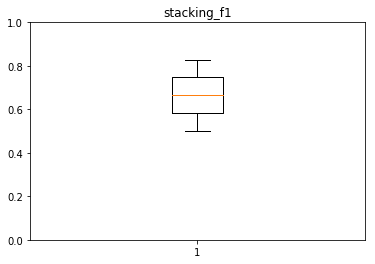

<Figure size 432x288 with 0 Axes>

In [21]:
cf_cv.train_save_metrics([('clf', ensemble_clf),], 
                           'f1', 
                         'stacking',
                         num_cv=2,
                         roc_auc=False)